### Step - 1 - Introduction -> Give a detailed data description and objective


# Adult Dataset 

### Data Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

### Features Description

1. Categorical Attributes

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category

**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
Individual's highest education degree

**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation

**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family

**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual

**sex:** Female, Male.

**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

2. Continuous Attributes

**age:** continuous.
Age of an individual

**fnlwgt:** final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

**capital-gain:** continuous.

**capital-loss:** continuous.

**hours-per-week:** continuous.
Individual's working hour per week


**income** is the dependent or target variable 


### Step - 2 - Import the data and perform basic pandas operations. 

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


#sns.set_style('ticks')
#plt.style.use('fivethirtyeight')



In [2]:
df=pd.read_csv("adult.csv",na_values="?")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

- the dataset consists, of "48842" rows and 15 columns

In [4]:
df.size

732630

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- The dataset consists of 6 quantitative variables and 9 qualitative variables
- "Income" is the target variable, or dependent variable and rest 14 columns are independent variables.

prof = ProfileReport(df,title="Adult Salary Analysis")
prof.to_notebook_iframe()

### Step - 3 - Univariate Analysis 

### Univariate Analysis for Numerical Columns

In [6]:
df_num=df.select_dtypes(exclude="object")
df_num.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [7]:
df_num.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,education,educational-num
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


- educational_num seems to be just the level of education a person has persued in our dataset , so it can be categorised as a ordinal qualitative variable.
- so we can drop the variable educational-num because it just describes the level of education in numerical form, which can also be intuited by the education column.

In [9]:
df.drop("educational-num",axis=1,inplace=True)

### Visualisations

#### Distrubution Plots

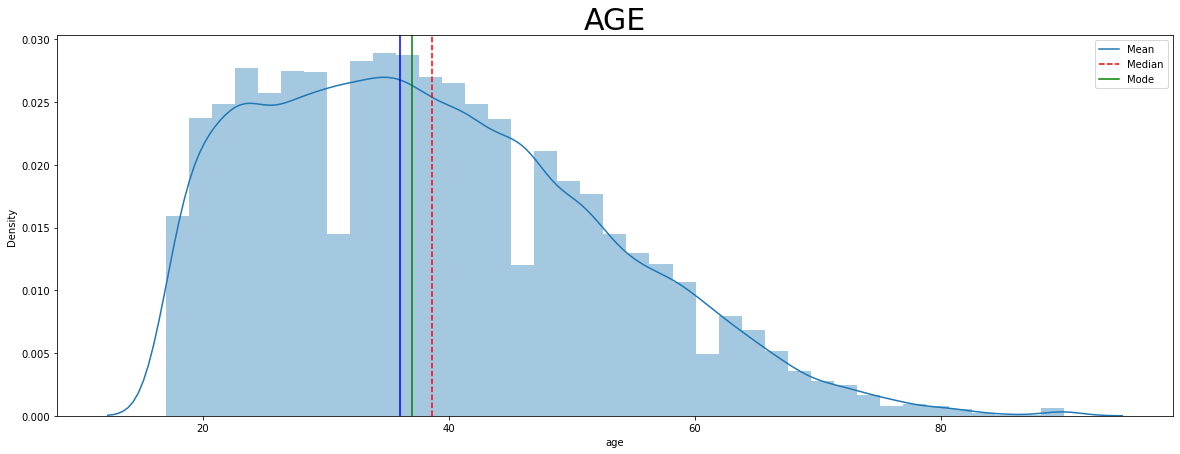

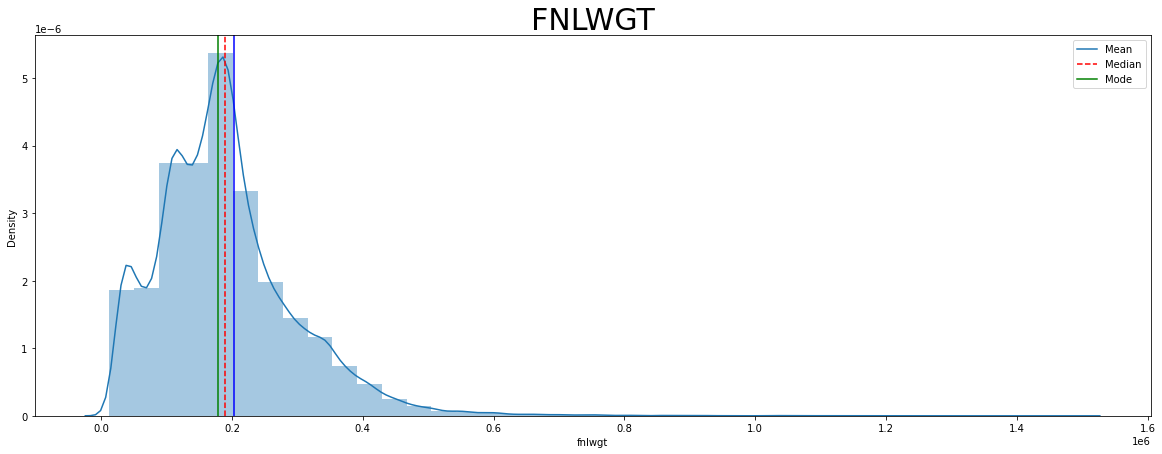

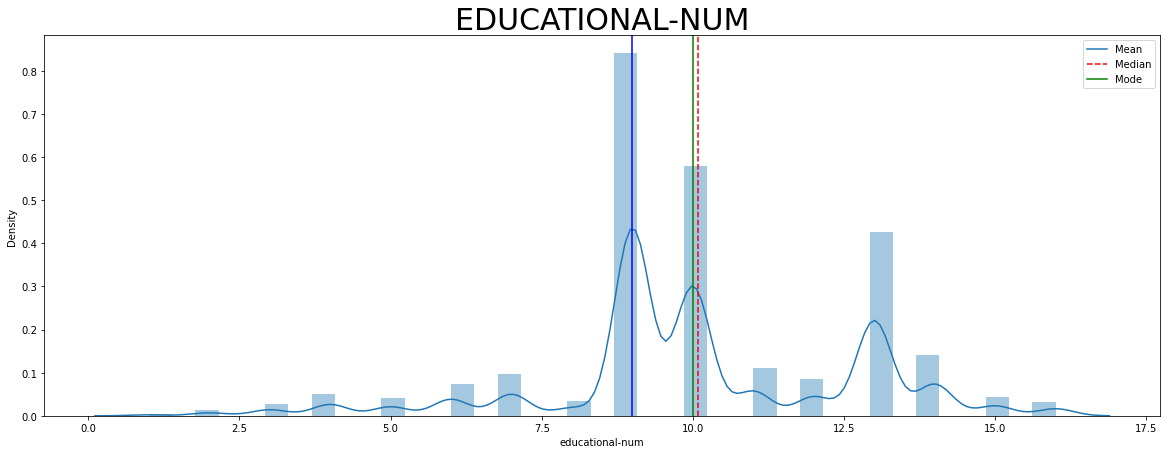

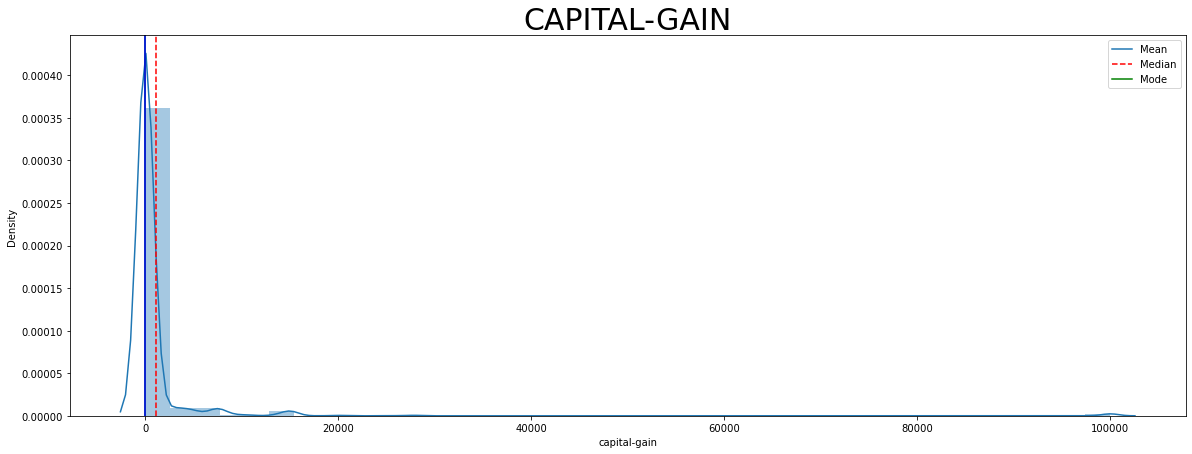

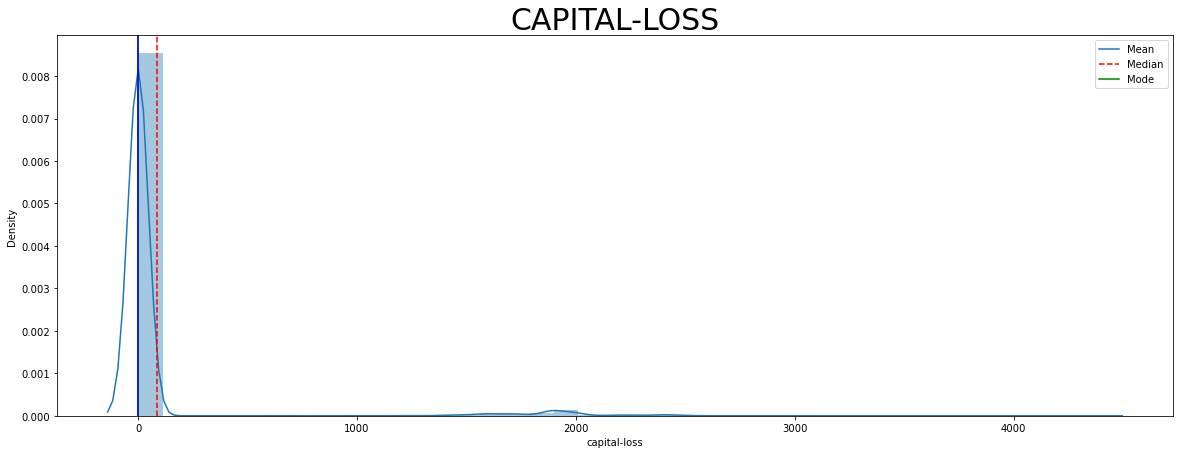

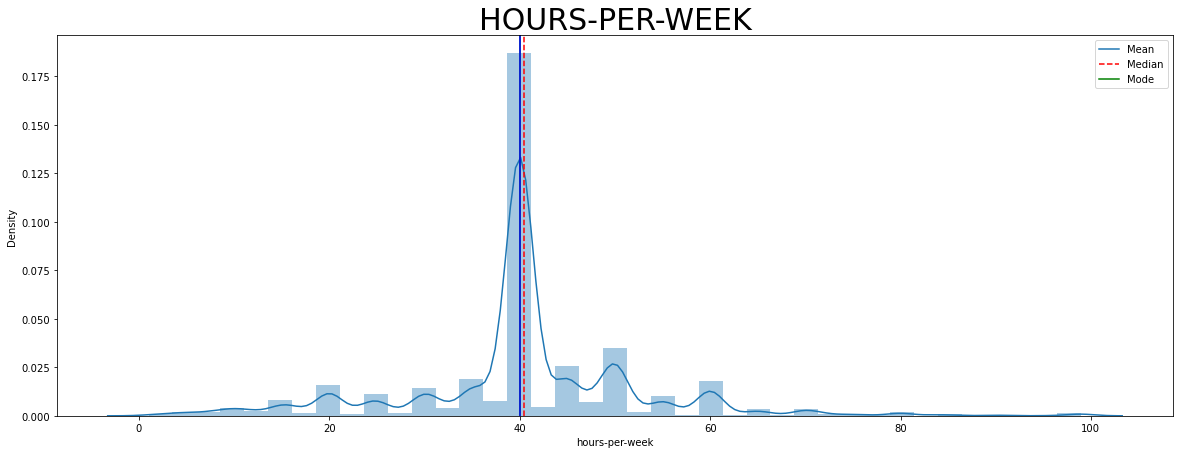

In [10]:
for i in df_num:
    plt.figure(figsize=(20,7))
    sns.distplot(df_num[i].dropna(),kde=True,bins=39)
    plt.title(i.upper(),fontsize=30)
    plt.axvline(df_num[i].mean(), color='r', linestyle='--')
    plt.axvline(df_num[i].median(), color='g', linestyle='-')
    plt.axvline(df_num[i].mode()[0], color='b', linestyle='-')

    plt.legend({'Mean':df_num[i].mean(),'Median':df_num[i].median(),'Mode':df_num[i].mode()[0]})

### Histograms

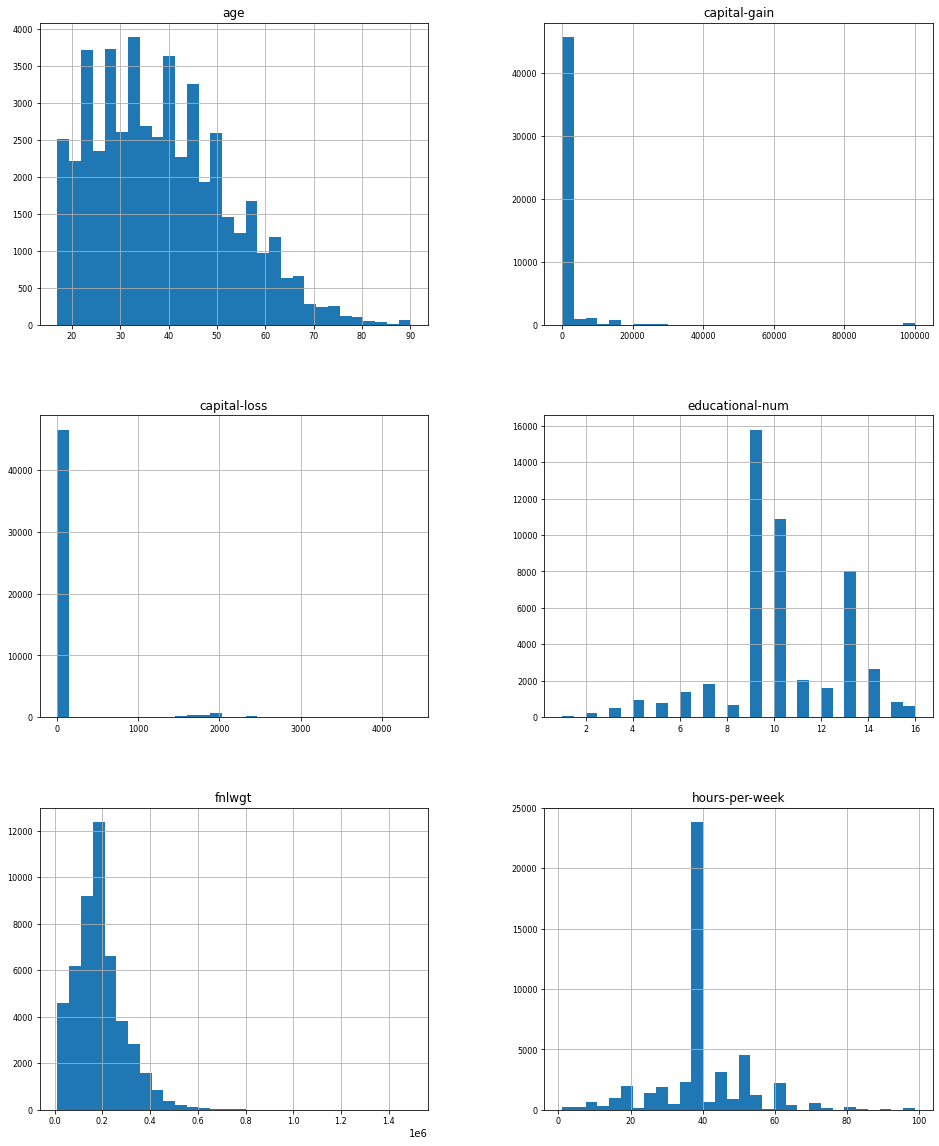

In [11]:
df_num.hist(figsize=(16, 20), bins=30, xlabelsize=8, ylabelsize=8); 

###  Age :

- The mean value is 38.64 i.e. on an average the value of age attribute is 38.
- Age is having the standerd deviation 13.75 which indicates the deviation of an observation from the mean.
- The 1st quartile is 28 i.e. 25% of the observations lies below 28.
- 3rd quartile is 48 which indicates that in 75% of the observations the value of age is less than 48.
- The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 48.
- The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum made the distribution right skewed.

### fnlwgt :

- This is the sampling weight corresponding to the observations.
- finalweight seems to be rightly skewed since there is very large distance between median & maximum value as compared to minimum & median value.

### capital-gain :

- For capital-gain, the mean is 1079.06 and median is 0, which indicates that the distribution is highly right skewed.
- From the quartiles it is clearly visible that 75% observations are having capital gain zero.
- capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results in the large standard deviation(7452.01).
- capital-gain shows that either a person has no gain or has gain of very large amount(10k or 99k).
- by which we can infer that, people either dont invest, and those who invest get gain within the range of 10k to 99k

In [12]:
df[df["capital-loss"]>0].shape[0]/len(df["capital-loss"])*100

4.672208345276607

### capital-loss:
- most of the "capital-loss" values are centered on 0 and only 2282 i.e only about 5% of values are not 0.
- This attribute is similar to the capital-gain i.e. most of the values are centered on 0(nearly 43000 of them)

In [13]:
df["hours-per-week"].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

### hours-per-week
- the hours per week atrribute ranges from 1 to 99.
- Most people work for 40 hours per week, they are roughly 22,803 people
- There are also few people who works 80-100 hours per week and some less than 20 which is unusual.
- 75% of the people spend 45 or less working hours per week.

#### Box Plots

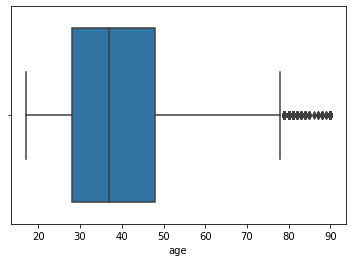

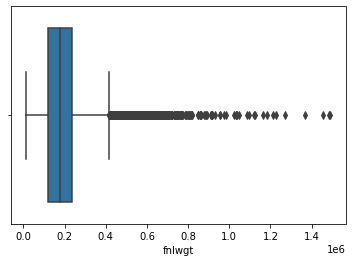

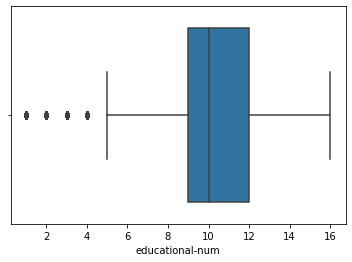

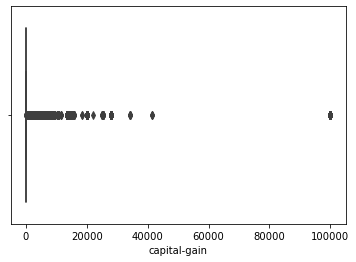

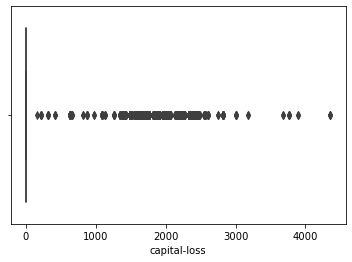

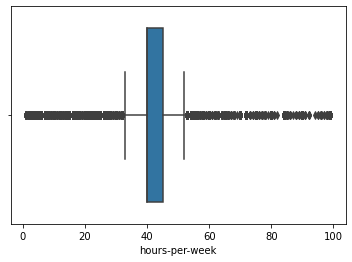

In [14]:
for i, col in enumerate(df_num.columns):
    plt.figure(i);
    sns.boxplot(x=col, data=df_num);
    

- age,fnlwgt,capital_gain,capital_loss are having outliers on upper bound.
- hours_per_week have outliers on both upper and lower bounds.

In [15]:
df.loc[(df['capital-gain'] > 0),'capital-gain'] = 1
df.loc[(df['capital-gain'] == 0 ,'capital-gain')]= 0

In [16]:
df.loc[(df['capital-loss'] > 0),'capital-loss'] = 1
df.loc[(df['capital-loss'] == 0 ,'capital-loss')]= 0

df_c.drop("fnlwgt",axis=1,inplace=True)

### Univariate Analysis for Categorical columns

In [17]:
df_cat=df.select_dtypes(include="object")
df_cat

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [18]:
df_cat.describe()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [19]:
mode=[df_cat[col].mode()[0] for col in df_cat ]
mode

['Private',
 'HS-grad',
 'Married-civ-spouse',
 'Prof-specialty',
 'Husband',
 'White',
 'Male',
 'United-States',
 '<=50K']

In [20]:
per_mode=[round((df[per].value_counts()[0]/len(df["education"]))*100,2) for per in df_cat]
per_mode   

[69.42, 32.32, 45.82, 12.64, 40.37, 85.5, 66.85, 89.74, 76.07]

In [21]:
frequency=[df[per].value_counts()[0] for per in df_cat]

In [22]:
cat_info=pd.DataFrame()
cat_info["attributes"]=df_cat.columns
cat_info["mode"]=mode
cat_info["freq"]=frequency
cat_info["percentage_mode"]=per_mode



In [23]:
cat_info

,attributes,mode,freq,percentage_mode
0,workclass,Private,33906,69.42
1,education,HS-grad,15784,32.32
2,marital-status,Married-civ-spouse,22379,45.82
3,occupation,Prof-specialty,6172,12.64
4,relationship,Husband,19716,40.37
5,race,White,41762,85.50
6,gender,Male,32650,66.85
7,native-country,United-States,43832,89.74
8,income,<=50K,37155,76.07


- we can observe that there is huge class imbalance in all the categorical columns and the columns are very much biased to the most_frequent values.
- **Workclass** : about 69% of people in our dataset have private sector jobs.
- **education** : 32.32% of people are high school graduates.
- **marital_status**: 45% data has married people .
- **occupation**: 13% have professional speciality jobs.
- **relationship**: most people in dataset are husbands about, 40%
- **race**: 85.50% white people.
- **gender**: 67% males, that explains why most people have relationship status as husband.
- **native_country** : 90% of the data comes from United States, which is highly biased.
- **income**: 76% of people in our dataset earn less than 50,000 

In [24]:
for column in df.columns:
    print(column.upper()," :",df[column].nunique(),"unique values")
    print(df[column].unique())
    print("*"*50)

AGE  : 74 unique values
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
**************************************************
WORKCLASS  : 8 unique values
['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
**************************************************
FNLWGT  : 28523 unique values
[226802  89814 336951 ... 129912 255835 257302]
**************************************************
EDUCATION  : 16 unique values
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
**************************************************
MARITAL-STATUS  : 7 unique values
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spou

### Visualization for Categorical Variables

### Countplot

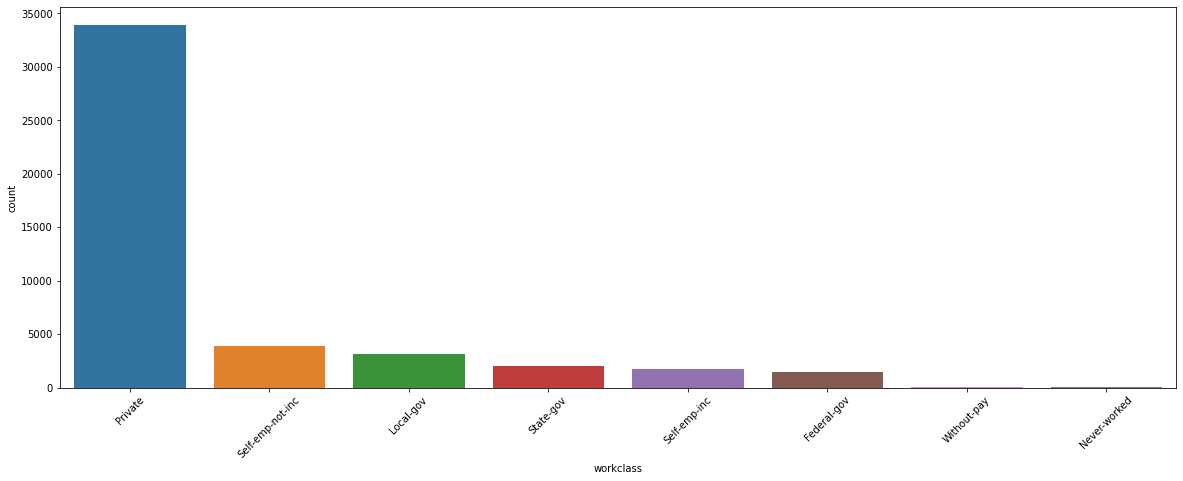

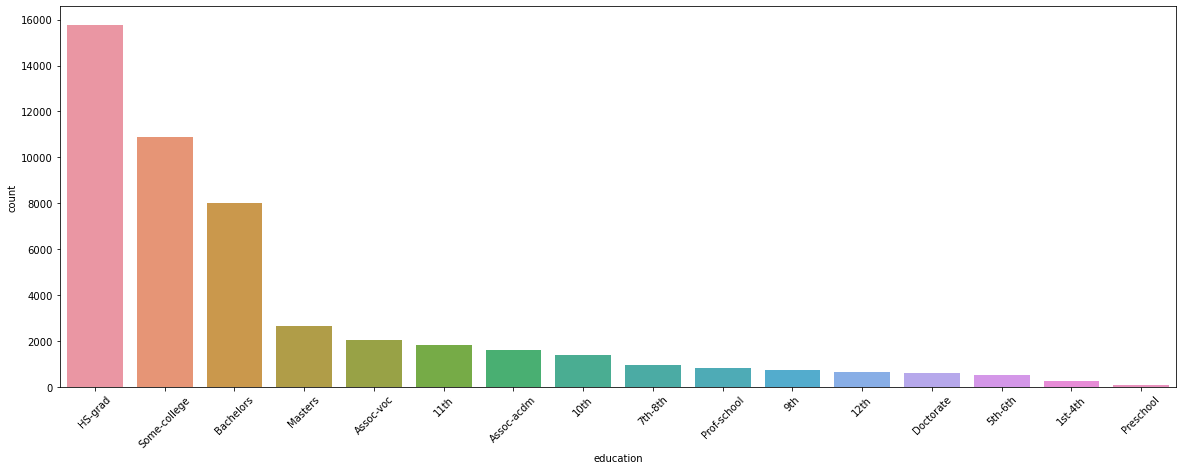

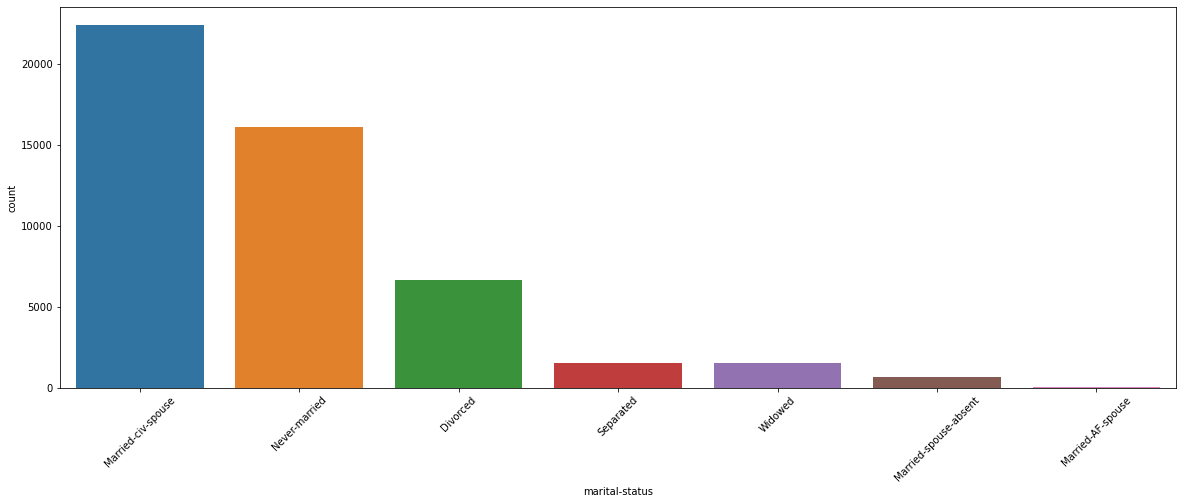

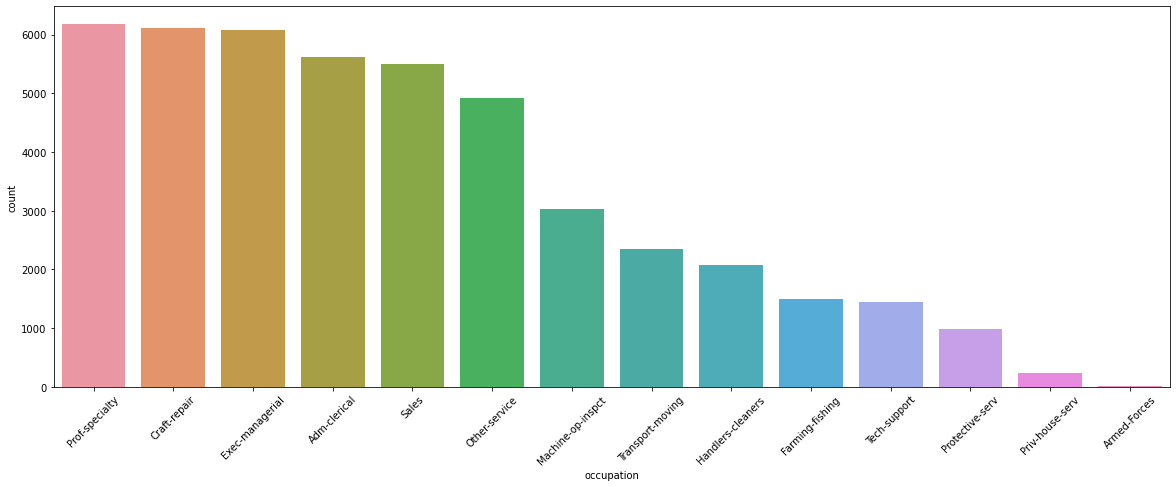

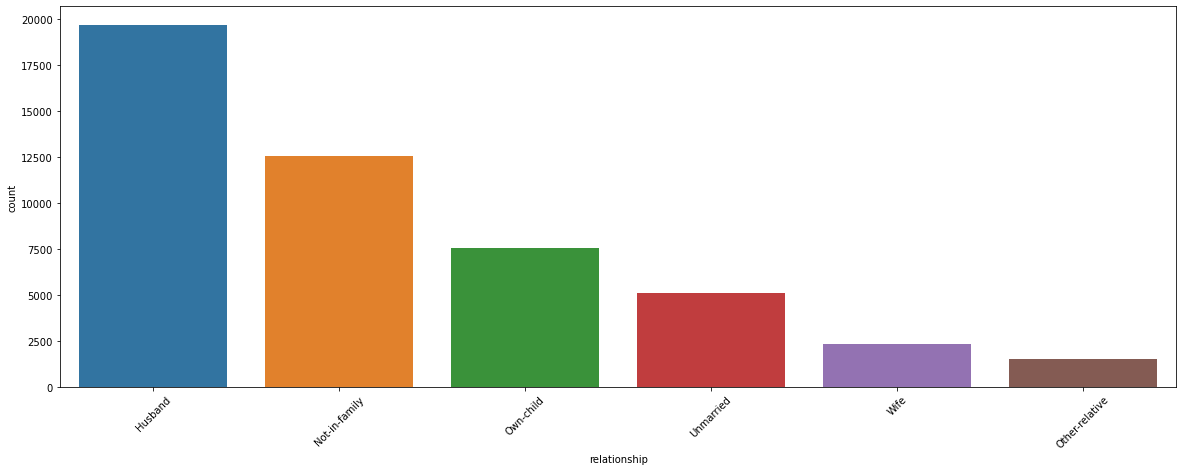

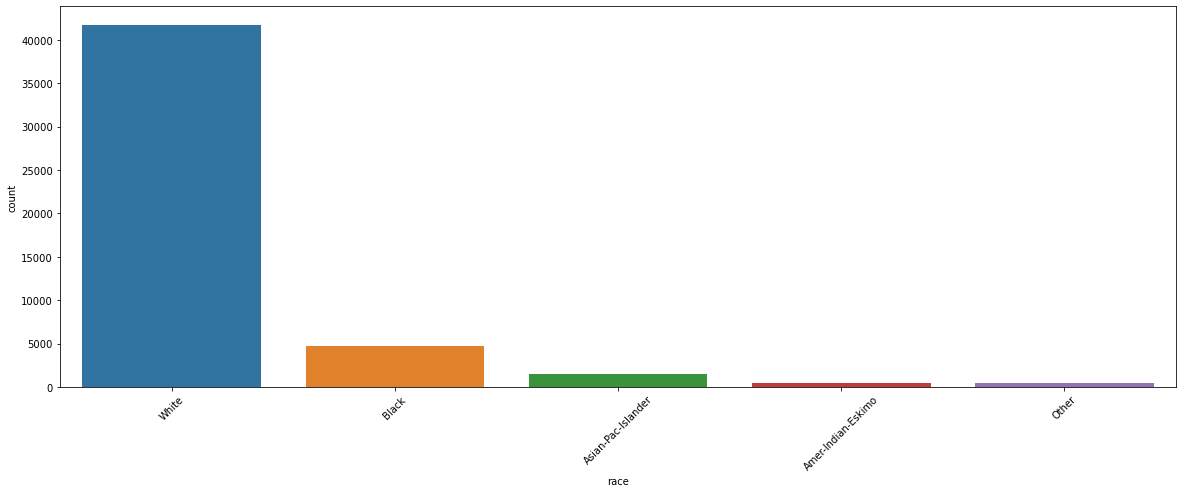

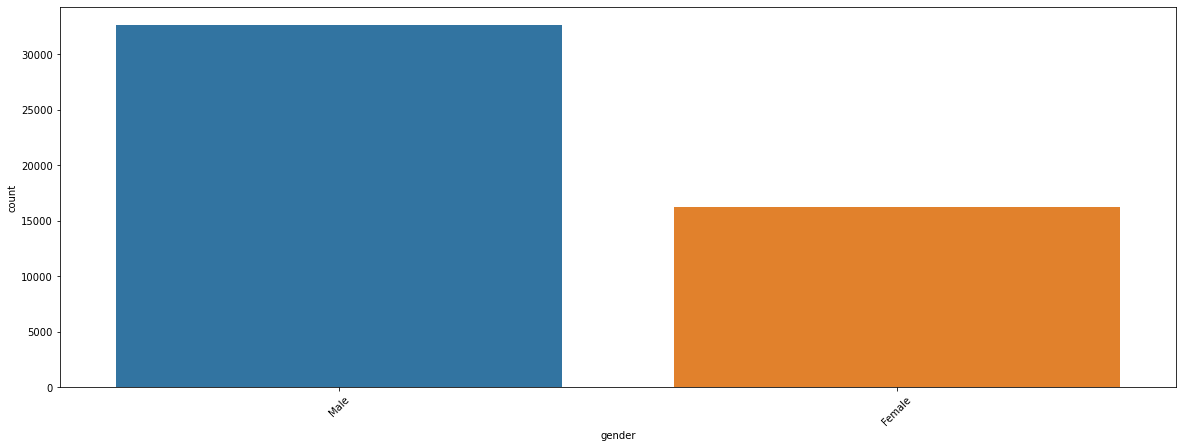

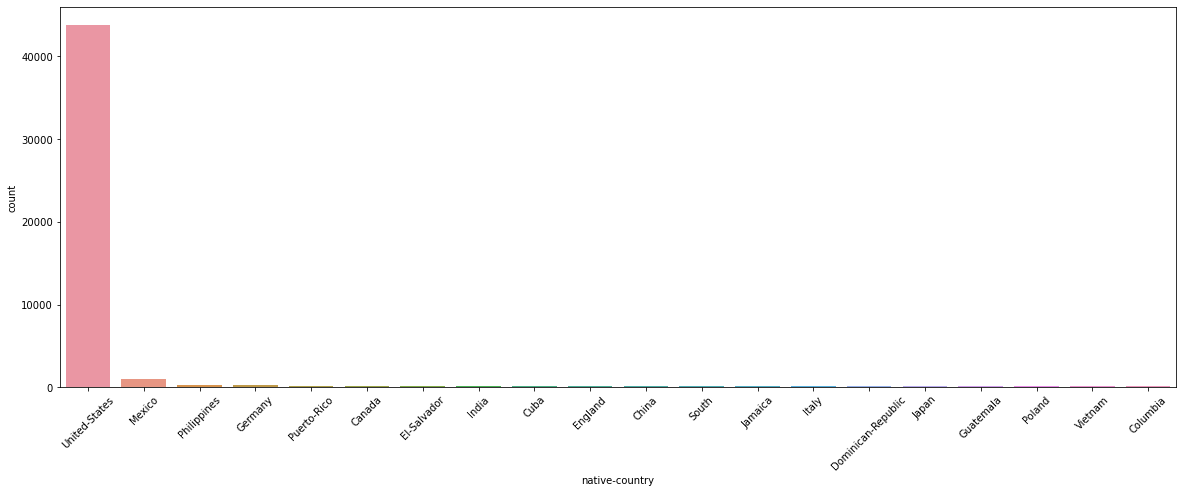

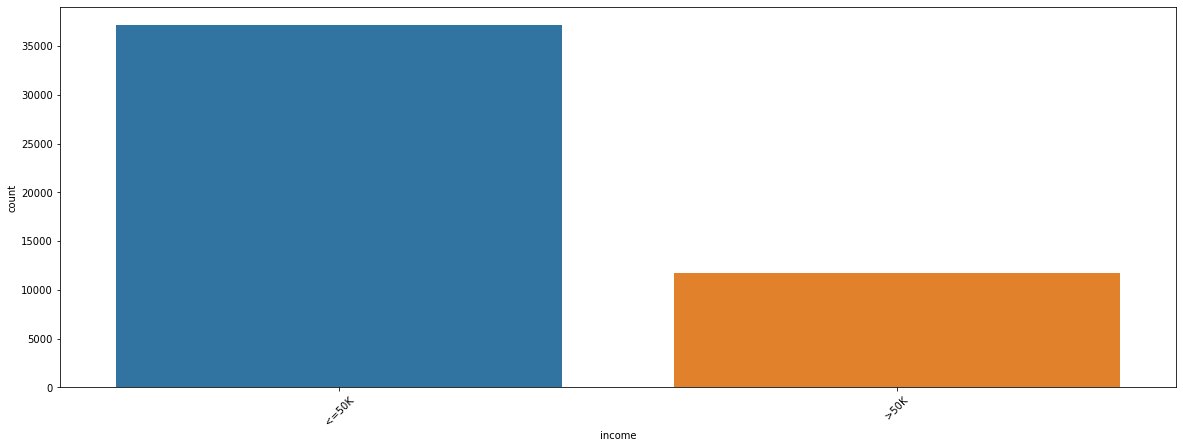

In [25]:
for i in df_cat.columns:
    plt.figure(figsize=(20,7))
    sns.countplot(df_cat[i].dropna(), order=df[i].value_counts().iloc[:20].index)
    plt.xticks(rotation=45)

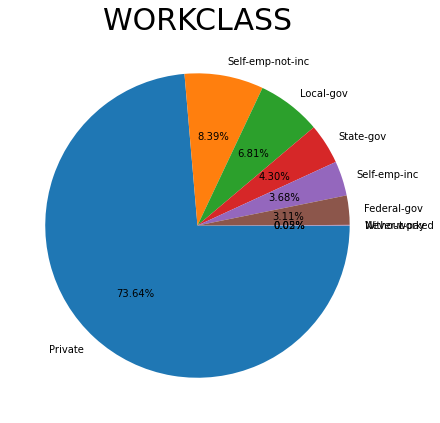

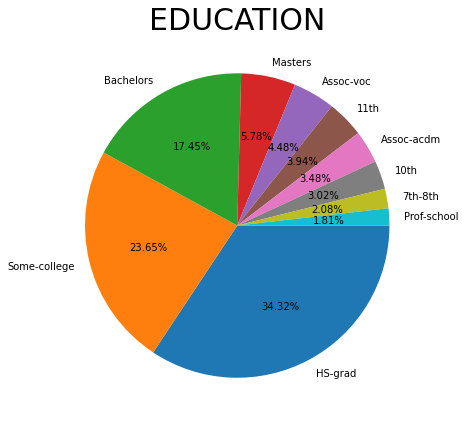

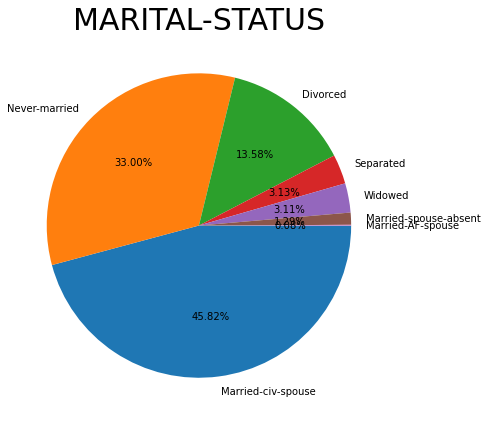

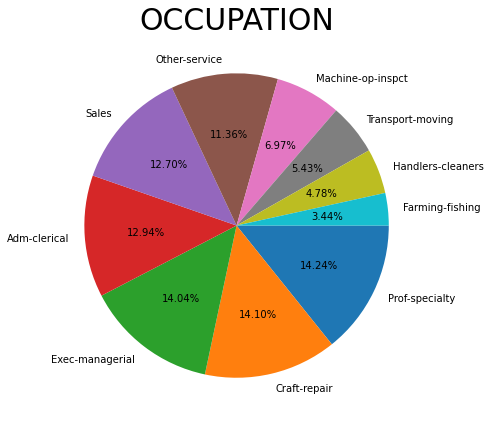

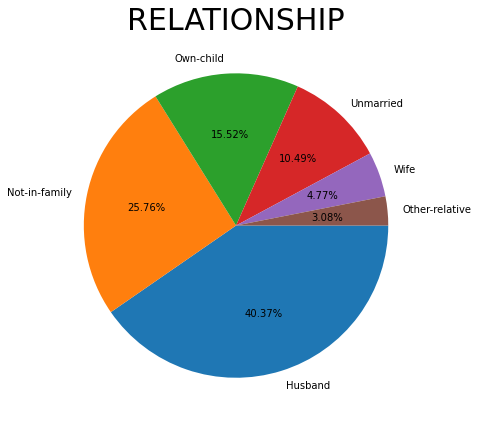

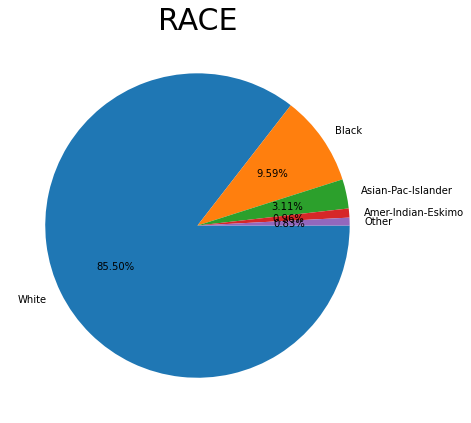

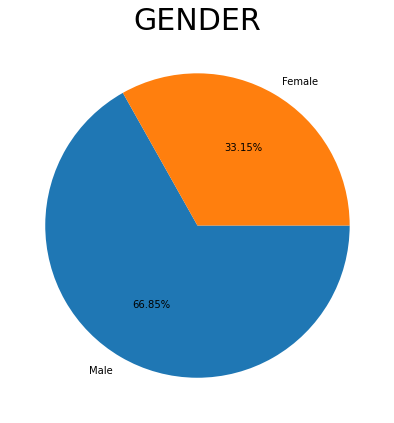

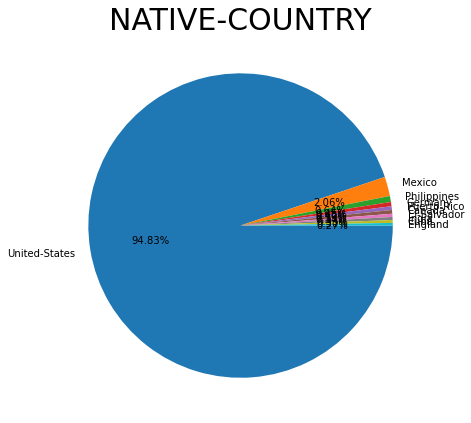

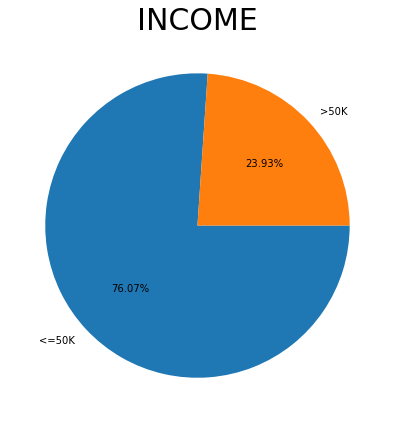

In [26]:
for i in df_cat.columns:
    plt.figure(figsize=(20,7))
    plt.pie(df_cat[i].value_counts()[:10], labels=df_cat[i].value_counts().iloc[:10].index,counterclock=False, autopct='%0.2f%%')
    plt.title(i.upper(),fontsize=30)
    plt.show()

### Workclass

- There are 8 unique categories present in the worclass attribute.
- Most of them belong to the private workclass(36705) i.e. 75.15%.
- without-pay and never-worked has minimum count in workclass attribute(less than 1%).
- There is huge imbalance in the categories of workclass attribute.


### Education
- There are 16 unique categories present in the education attribute.
- Hs-grad has 32.32% of all the education attribute.
- HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025).
- Pre-school has minimum samples i.e. 83.


### Marital Status
- Two categories are dominate over other categories i.e.,  Never-married(33%) and married-civ-spouse(45.82%).
- Married-civ-spouse has maximum number of samples i.e 45.82 %
- Married-AF-spouse has minimum number of observations.


### Occupation
- Prof-specialty has the maximum count(6172) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
- Armed-Forces has minimum samples in the occupation attribute.


### Relationship 
- Husband has maximum percentage (40.37%) among all categories followed by not-in-family(25.76%)

### Race
- Most of the people in dataset are "white" which is 85.50%.
- This dataset is totally bias toward the "white" race.
- Second major race in the dataset is the "black" with just 9.59%.

### Gender
- the frequency of male(32650) is higher than the female(16192) categories.
- Distribution shows that this dataset is skewed toward the male with nearly 67%.

### Native_Country

- As 94.83% of them have native country America and others are immigrants.
- since this dataset is sampled from US, this explains the reason for bias in the native_country and race.

### Income
- the dataset is highly imbalanced since it consists of imbalanced class ratio in the target variable
- 76.07% of observation earn <50k and 23.093% earn more than 50k.

### 3.1 Find and treat the outliers and missing values in each column

### Missing Value Treatment

In [27]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

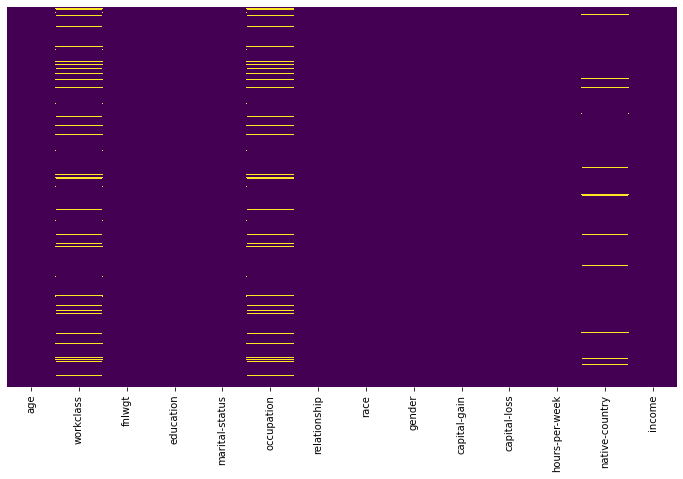

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap='viridis');

- we can see a pattern in missing values, The missing values in  "workclass" attribute and "occupation" attribute are correlating meaning, the rows where the workclass column has nan values, the occupation will most likely have nan values, since workclass is mostly provided during a survey compared to the actually occupation, this could be one reason.

### the % of missing values for each column 

In [29]:
df.shape[0]

48842

In [30]:
100* (df.isnull().sum()/df.shape[0])

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
gender            0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
income            0.000000
dtype: float64

In [31]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

- We can observe that the ratio of missing values is very less so it would not be much loss to drop the nan values.
- I will drop the rows where native country is missing.

In [32]:
df.dropna(subset=["native-country"],axis=0,inplace=True)

In [33]:
df.reset_index(drop="index")

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1,0,40,United-States,>50K
4,18,NaN,103497,Some-college,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47980,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
47981,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
47982,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
47983,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
df.groupby(['gender','education',"native-country"])["workclass"].agg(pd.Series.mode)

gender  education     native-country    
Female  10th          Canada                           Self-emp-inc
                      China                                      []
                      Columbia                              Private
                      Cuba                                       []
                      Dominican-Republic                    Private
                                                     ...           
Male    Some-college  Thailand              [Private, Self-emp-inc]
                      Trinadad&Tobago          [Local-gov, Private]
                      United-States                         Private
                      Vietnam                               Private
                      Yugoslavia            [Private, Self-emp-inc]
Name: workclass, Length: 740, dtype: object

- we can observe that the workclass varies based on the gender, education and native_country, so imputing only based on mode of the column will create bias to the column since already mode of the workclass against the classes is very high i.e., almost 70% imputing any further with the mode will increase the number of "Private" observations in the dataset , so it is better to drop. 

In [35]:
df.dropna(subset=["workclass"],axis=0,inplace=True)

In [36]:
df.groupby(['gender','education',"native-country"])["occupation"].agg(pd.Series.mode)

gender  education     native-country    
Female  10th          Canada                                               Sales
                      Columbia                                 Machine-op-inspct
                      Dominican-Republic                  [Other-service, Sales]
                      Ecuador                   [Exec-managerial, Other-service]
                      El-Salvador                                   Craft-repair
                                                            ...                 
Male    Some-college  Thailand                   [Adm-clerical, Exec-managerial]
                      Trinadad&Tobago       [Machine-op-inspct, Protective-serv]
                      United-States                                 Craft-repair
                      Vietnam                                       Adm-clerical
                      Yugoslavia                 [Adm-clerical, Exec-managerial]
Name: occupation, Length: 717, dtype: object

In [37]:
df["occupation"]=df.groupby(['gender','education',"native-country"])["occupation"].transform(lambda x: x.fillna(x.mode()[0]))

In [38]:
df.dropna(subset=["occupation"],axis=0,inplace=True)


In [39]:
df.reset_index(drop="index")

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1,0,40,United-States,>50K
4,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45227,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45228,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45229,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45230,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


df.drop("fnlwgt",axis=1,inplace=True)

In [40]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

- there are no missing values in our data

#### Age

### Outlier Treatment
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/

In [41]:
df_c=df.copy()

In [42]:
def outlier_detection(x):
    q1=df_c[x].quantile(0.25)
    q3=df_c[x].quantile(0.75)
    iqr=q3-q1
    threshold=1.5*iqr
    lower,upper=q1 - threshold, q3 + threshold
    print(lower,upper)
    outliers = [i for i in df_c[x] if i < lower or i > upper]
    return outliers
    

In [43]:
outliers= outlier_detection("age")

-0.5 75.5


In [44]:
for i in df_c["age"]:
    if i in outliers:
        df_c["age"]=df_c["age"].replace(i,75.5)
        

In [45]:
outlier_detection("age")

-0.5 75.5


[]

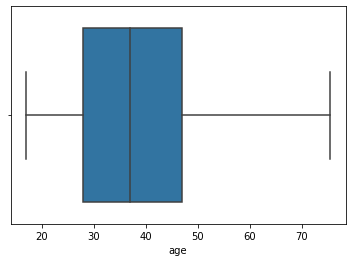

In [46]:
sns.boxplot(df_c["age"])

#### hours-per-week

In [47]:
outliers= outlier_detection("hours-per-week")

32.5 52.5


In [48]:
for i in df_c["hours-per-week"]:
    if i in outliers:
        if i <= 32.5 :
            df_c["hours-per-week"]=df_c["hours-per-week"].replace(i,32.5)
        else:
            df_c["hours-per-week"]=df_c["hours-per-week"].replace(i,52.5)

In [49]:
 outlier_detection("hours-per-week")

32.5 52.5


[]

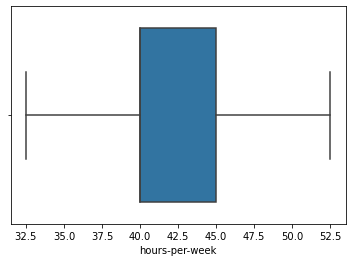

In [50]:
sns.boxplot(df_c["hours-per-week"])

- we can see that we have treated the outliers

### Bi_Variate Analysis

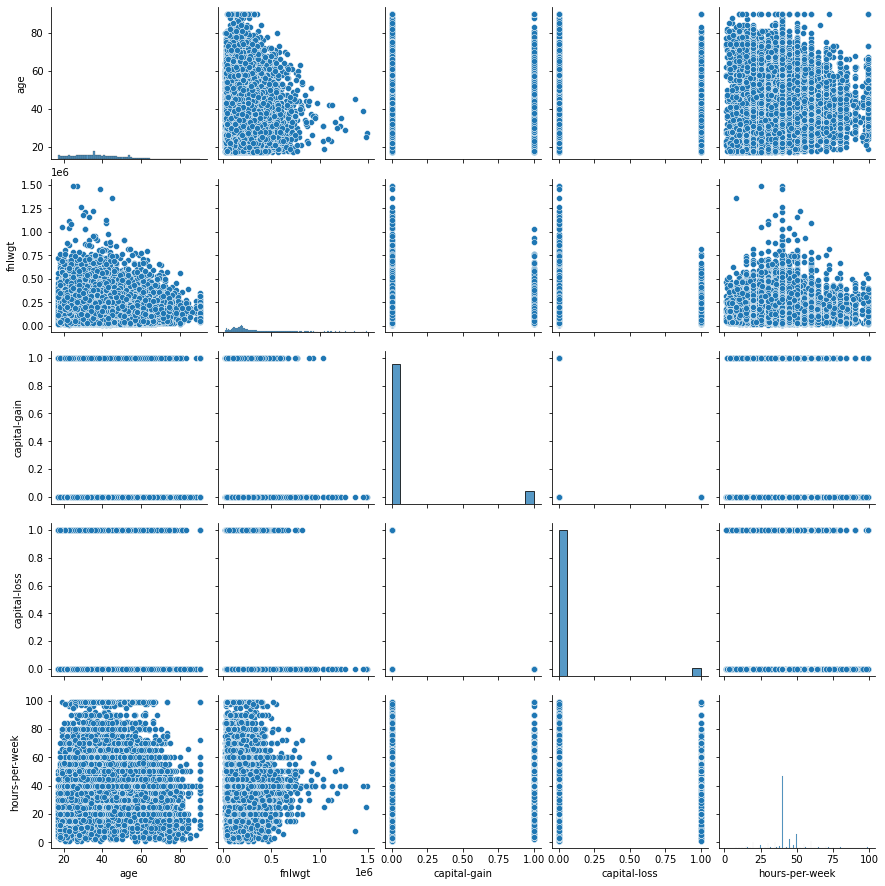

In [51]:
sns.pairplot(data=df)

cannot draw any relationship between the columns based on pairplot

In [52]:
df.groupby("income")["age"].mean()

income
<=50K    36.744474
>50K     44.006067
Name: age, dtype: float64

- people above the age of 35 earn above 50k

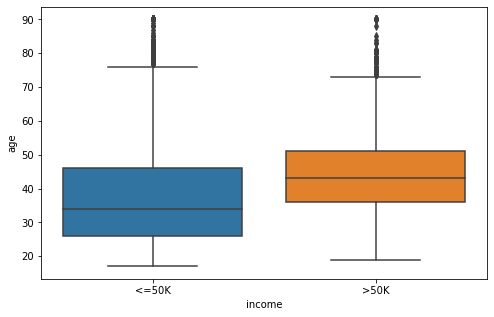

In [53]:
fig = plt.figure(figsize=(8,5)) 
sns.boxplot(x="income", y="age", data=df)
plt.show()

- The mean "age" for Income group(<=50k) is 36.8 years.
- And for Income group(>50k) is 43.97 years
- Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).


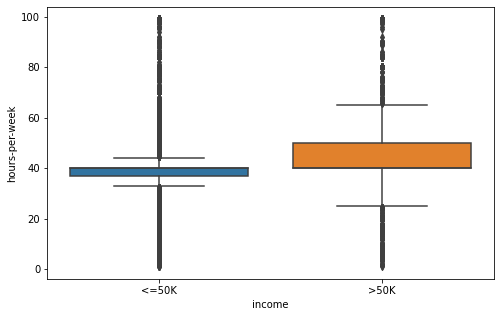

In [54]:
fig = plt.figure(figsize=(8,5)) 
sns.boxplot(x="income", y="hours-per-week", data=df)
plt.show()


- The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.
- Income group who earns >50k has spend ~44 "hours-per-week".(long hours)
- Income group who earns <=50k has spend ~37 "hours-per-week".
- although there are outliers for people <50k income who work for more hours yet earn less than 50k

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]),
 <a list of 74 Text major ticklabel objects>)

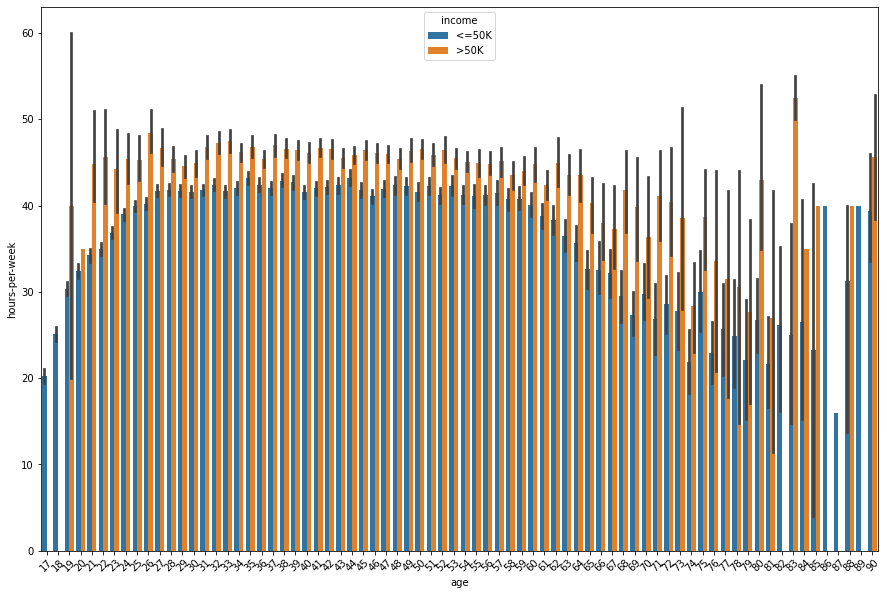

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(y="hours-per-week",x="age",hue="income",data=df)
plt.xticks(rotation=45)

- younger and older people work less than 40 hours, people below 24 years and  above 60 to an extent work less than 40 hours per week, yet consists of people whose income >50k.
- we can observe that mostly the older people earn more than 50k despite the hours of work, the reason could be years of experience.



(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

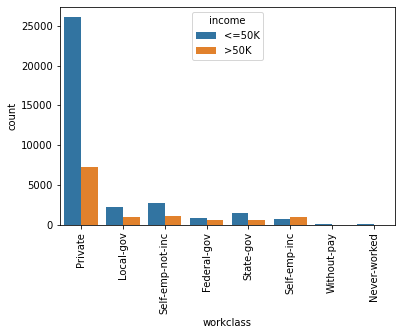

In [56]:
sns.countplot(x="workclass", hue="income", data=df)
plt.xticks(rotation=90)

- the self employed people have slightly high ratio of earning >50 k
- the private sector people are more but most of them earn <50k.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

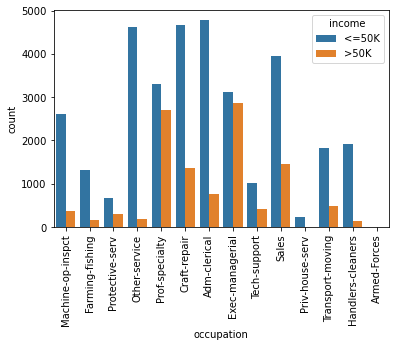

In [57]:
sns.countplot(x="occupation", hue="income", data=df)
plt.xticks(rotation=90)

- most of people i.e., 2900 people  with occupation in executive or manager level earn >50k.
- Professional speciality, and executive / manager roles have promising income >50k.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

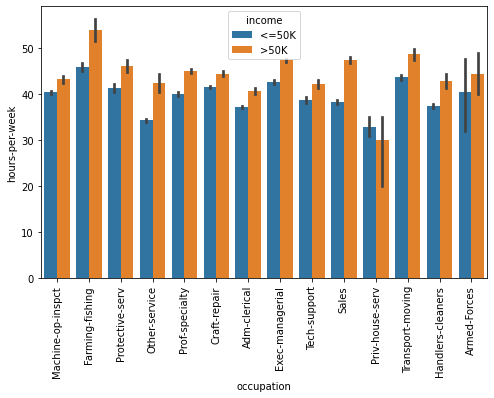

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(x="occupation",y="hours-per-week",hue="income",data=df)
plt.xticks(rotation=90)

- in all sectors of occupation people who work for more hours get payed more meaning tey earn >50k

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

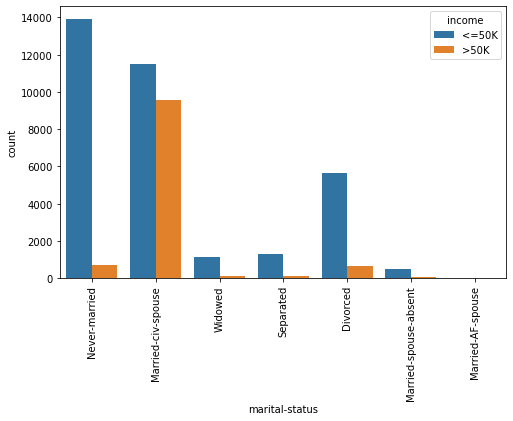

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(x="marital-status", hue="income", data=df)
plt.xticks(rotation=90)

- Married-civ-spouse has the highest percentage(20.44%) of falling under the income group 1(>50k).
- Despite the fact that we have 16117 observation in the marital-status attribute(which is sec. highest) but only 1.5% of the people of "Never-married" earn more than 50k.
- Married-spouse-absent and Married-AF-spouse has negligible contribution to the fall under income group 1.

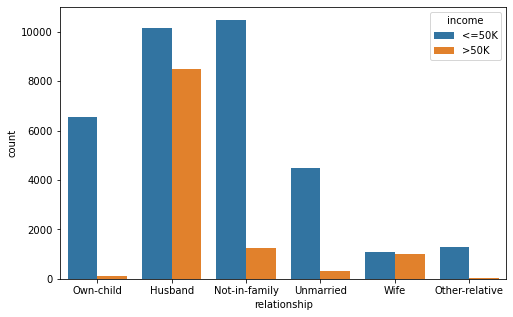

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(x="relationship", hue="income", data=df)

- husbands has the highest percentage(18.11%) of earning more than 50k in all the other categories.
- One thing to notice is that "not-in-family" has highest percentage(23.15%) to earn less than 50k but they had nearly same percentage(2.61%) as of the "wife"(2.24%) category. This comparsion is done due to fact that "wife" category has only 2.53% to fall under the income group 0.
- "own-child" and "other-relative" has the minimum percentage to fall under the income group 1 i.e. 0.23% and 0.11% respectively.
- There is huge difference between the percentage of fall either groups except for "husband" and "wife".

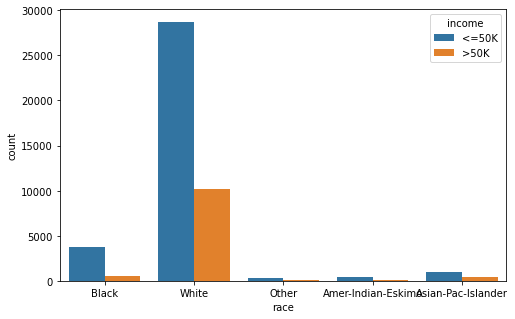

In [61]:
plt.figure(figsize=(8,5))
sns.countplot(x="race", hue="income", data=df)

- "white" race with "income" >50k are more nut also the ratio is less.
- There is huge difference between the percentage of fall either groups for each "race" except for the "other"(.63%) and "amer-indian-eskimo"(.74%) but this could be due the lesser number of observations for those categories.

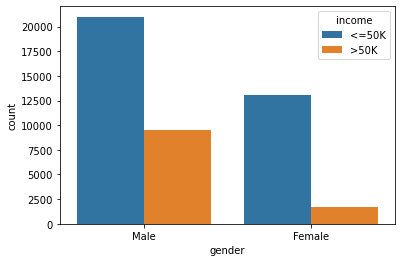

In [62]:
sns.countplot(x="gender", hue="income", data=df)

- count of males is more than females

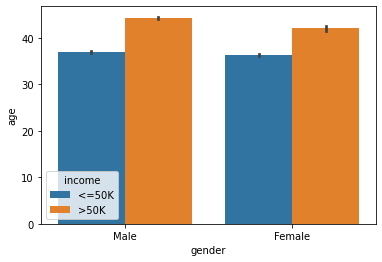

In [63]:
sns.barplot(x="gender", y="age",hue="income", data=df)

- no. of older males who earn >50k is slightly higher than females who earn >50k

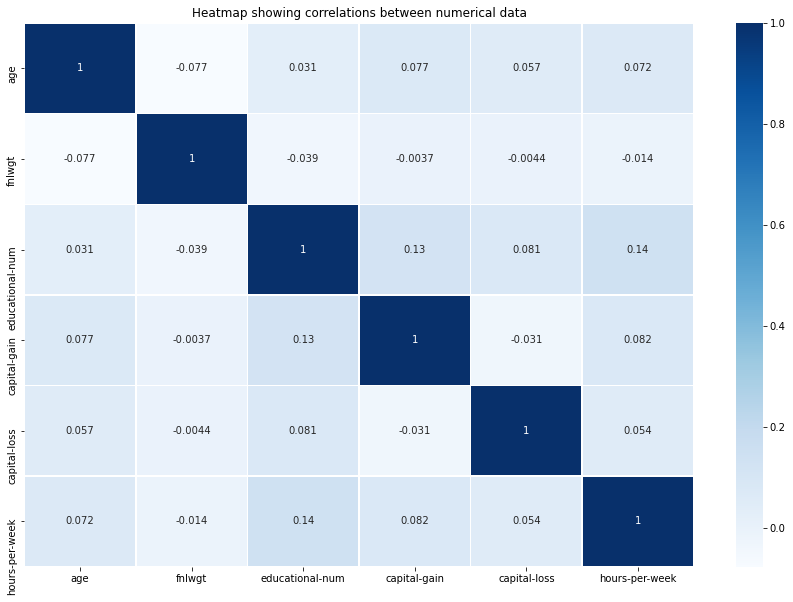

In [64]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_num.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()


- There is no strong correlation among the numeric attributes.
- There is neither strong positive nor strong negative correlation present in any variable .


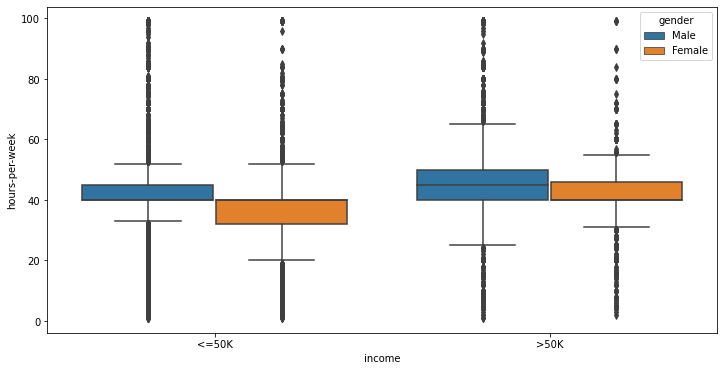

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=df)
plt.show()

- Females have more flexible working hours per week in the income groups who earns <=50k.
- Males have more flexible working hours per week in the income groups who earns <=50k

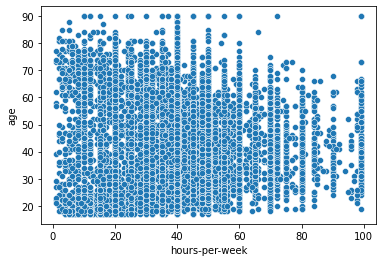

In [66]:
sns.scatterplot(x="hours-per-week",y="age",data=df)

- cannot draw any significant inference for the relationship between the age and hours of work.

Conclusion
- hours- per week play an important role in determing the income of a person.

### Feature Transformation 

In [67]:
df_ft=pd.get_dummies(df, columns=df_cat.columns)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_ft), columns = df_ft.columns)



### Prove Central Limit Theorem on ‘age’ column from the Adult Dataset

### The Central Limit Theorem 

The Central Limit theorem states that no matter what the distribution of the population, the sampling distribution of means will always approximate to Normal distribution as the size of the sample increases

and, the mean of the sampling distribution will approximately be equal to the population mean.

$$\mu =\bar{X}$$

finally, the standard deviation of sampling distribution will approximately be equal to the standard deviation of population divided by square root of the sample size "n".
 
 $$\sigma_\bar{x} = \frac {\sigma}{\sqrt n}$$

-reference:https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html#:~:text=The%20central%20limit%20theorem%20states,will%20be%20approximately%20normally%20distributed.

In [69]:
population=df["age"]

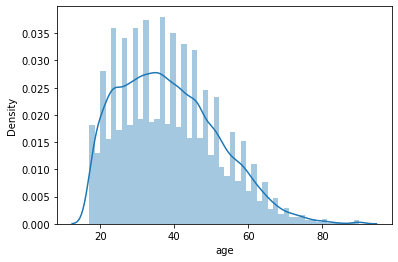

In [70]:
sns.distplot(df["age"])

- our population distribution is right_skewed

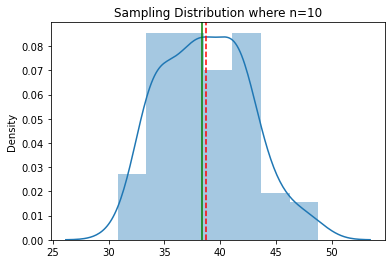

In [71]:
sample_means10=[df["age"].sample(n=10,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means10)
plt.title("Sampling Distribution where n=10")
plt.axvline(np.mean(sample_means10), color='r', linestyle='--')
plt.axvline(np.median(sample_means10), color='g', linestyle='-')


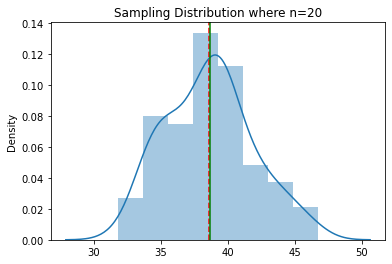

In [72]:
sample_means20=[df["age"].sample(n=20,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means20)
plt.title("Sampling Distribution where n=20")
plt.axvline(np.mean(sample_means20), color='r', linestyle='--')
plt.axvline(np.median(sample_means20), color='g', linestyle='-')


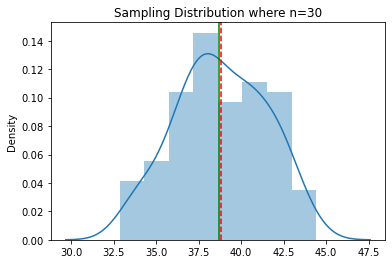

In [73]:
sample_means30=[df["age"].sample(n=30,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means30)
plt.title("Sampling Distribution where n=30")
plt.axvline(np.mean(sample_means30), color='r', linestyle='--')
plt.axvline(np.median(sample_means30), color='g', linestyle='-')


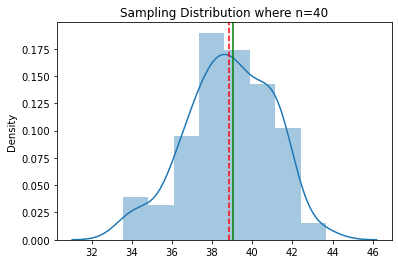

In [74]:
sample_means40=[df["age"].sample(n=40,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means40)
plt.title("Sampling Distribution where n=40")
plt.axvline(np.mean(sample_means40), color='r', linestyle='--')
plt.axvline(np.median(sample_means40), color='g', linestyle='-')


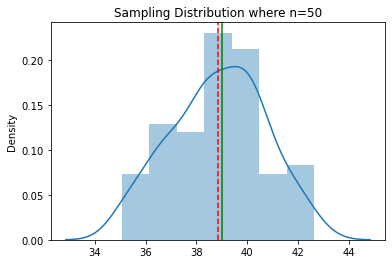

In [75]:
sample_means50=[df["age"].sample(n=50,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means50)
plt.title("Sampling Distribution where n=50")
plt.axvline(np.mean(sample_means50), color='r', linestyle='--')
plt.axvline(np.median(sample_means50), color='g', linestyle='-')

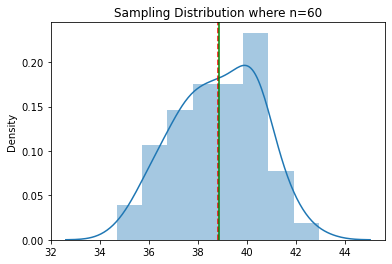

In [76]:
sample_means60=[df["age"].sample(n=60,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means60)
plt.title("Sampling Distribution where n=60")
plt.axvline(np.mean(sample_means60), color='r', linestyle='--')
plt.axvline(np.median(sample_means60), color='g', linestyle='-')

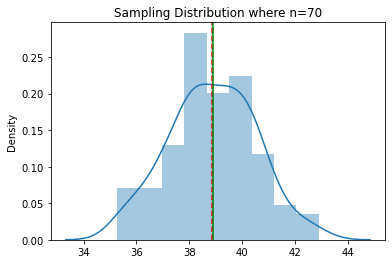

In [77]:
sample_means70=[df["age"].sample(n=70,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means70)
plt.title("Sampling Distribution where n=70")
plt.axvline(np.mean(sample_means70), color='r', linestyle='--')
plt.axvline(np.median(sample_means70), color='g', linestyle='-')

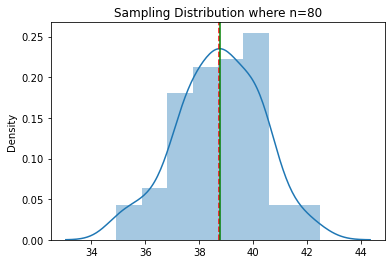

In [78]:
sample_means80=[df["age"].sample(n=80,random_state=i).mean() for i in range(100)]
sns.distplot(sample_means80)
plt.title("Sampling Distribution where n=80")
plt.axvline(np.mean(sample_means80), color='r', linestyle='--')
plt.axvline(np.median(sample_means80), color='g', linestyle='-')

- we can observe that as the sample size increases, the sampling distribution approximates normal distribution

In [79]:
print("We can observe that as the sample size increases, the sampling distribution approximates normal distribution")
print("\n")
print("The population mean {} is approximately equal to the mean of the sampling distribution {}".format(df["age"].mean(),np.mean(sample_means80)))
sam_std=np.std(sample_means80)
std_sqrt_n=df["age"].std()/(80)**0.5
print("\n")
print("The standard deviation of sampling distribution {} is approximately  equal to the standard deviation of population divided by square root of the sample size {}.".format(sam_std,std_sqrt_n))
print("\n")


We can observe that as the sample size increases, the sampling distribution approximates normal distribution


The population mean 38.54381853555005 is approximately equal to the mean of the sampling distribution 38.731375


The standard deviation of sampling distribution 1.5615151846443893 is approximately  equal to the standard deviation of population divided by square root of the sample size 1.4779778880507115.




### Hence Proved Central Limit Theorem

## Use Chi Square Test to answer this question “Is there a relationship between occupation and gender? (or does the preference of occupation depend on the gender)” 

 Hypothesis test (to test the relationship between occupation & gender)

- Null Hypothesis :- there is no relationship between "occupation" and "gender".
- Alternate Hypothesis :- there is some relationship between "occupation" and "gender".

In [80]:
# contingency table
c_t = pd.crosstab(df['occupation'],df['gender'],margins = True) 
c_t

gender,Female,Male,All
occupation,,,
Adm-clerical,3731,1810,5541
Armed-Forces,0,14,14
Craft-repair,315,5712,6027
Exec-managerial,1724,4260,5984
Farming-fishing,95,1385,1480
Handlers-cleaners,253,1793,2046
Machine-op-inspct,793,2177,2970
Other-service,2644,2166,4810
Priv-house-serv,218,14,232


In [81]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [82]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)


dof=28
p_value 0.0
[[1.80053100e+03 3.74046900e+03 5.54100000e+03]
 [4.54925716e+00 9.45074284e+00 1.40000000e+01]
 [1.95845521e+03 4.06854479e+03 6.02700000e+03]
 [1.94448249e+03 4.03951751e+03 5.98400000e+03]
 [4.80921472e+02 9.99078528e+02 1.48000000e+03]
 [6.64841440e+02 1.38115856e+03 2.04600000e+03]
 [9.65092412e+02 2.00490759e+03 2.97000000e+03]
 [1.56299478e+03 3.24700522e+03 4.81000000e+03]
 [7.53876901e+01 1.56612310e+02 2.32000000e+02]
 [1.95228122e+03 4.05571878e+03 6.00800000e+03]
 [3.17148214e+02 6.58851786e+02 9.76000000e+02]
 [1.75731305e+03 3.65068695e+03 5.40800000e+03]
 [4.61424655e+02 9.58575345e+02 1.42000000e+03]
 [7.52577114e+02 1.56342289e+03 2.31600000e+03]
 [1.46980000e+04 3.05340000e+04 4.52320000e+04]]


In [83]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.950, critical=41.337, stat=8593.125
Dependent (reject H0)


#### There is a relationship between occupation and gender, meaning the occupation of a person depends on gender